# Exploratory Data Analysis

## 1. Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors

# Set plots style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load Data

In [2]:
TRAIN_PATH = '../data/raw/train.csv'
TEST_PATH = '../data/raw/test.csv'

train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

print(f'Train shape: {train_df.shape}')
print(f'Test shape: {test_df.shape}')

Train shape: (2662, 427)
Test shape: (666, 426)


In [3]:
train_df.head()

,id,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Target Analysis (Tm)

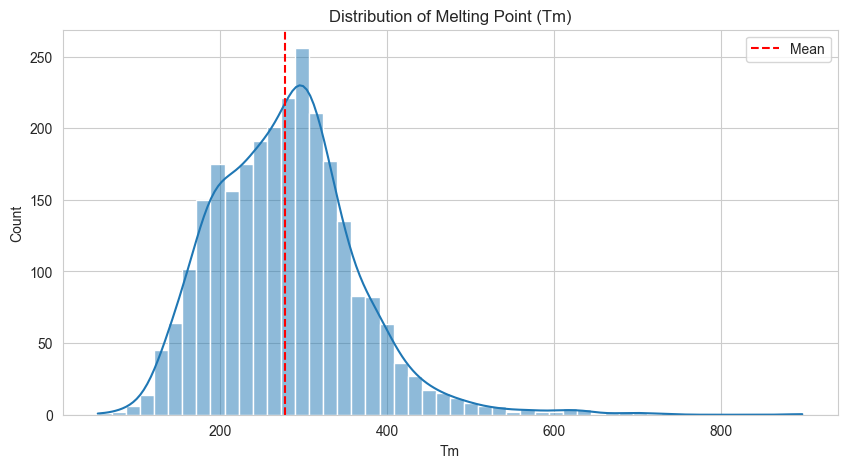

count    2662.000000
mean      278.263452
std        85.117914
min        53.540000
25%       217.000000
50%       277.300000
75%       325.150000
max       897.150000
Name: Tm, dtype: float64


In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df['Tm'], kde=True, bins=50)
plt.title('Distribution of Melting Point (Tm)')
plt.axvline(train_df['Tm'].mean(), color='r', linestyle='--', label='Mean')
plt.legend()
plt.show()

print(train_df['Tm'].describe())

## 4. Feature Analysis

Number of group features: 424


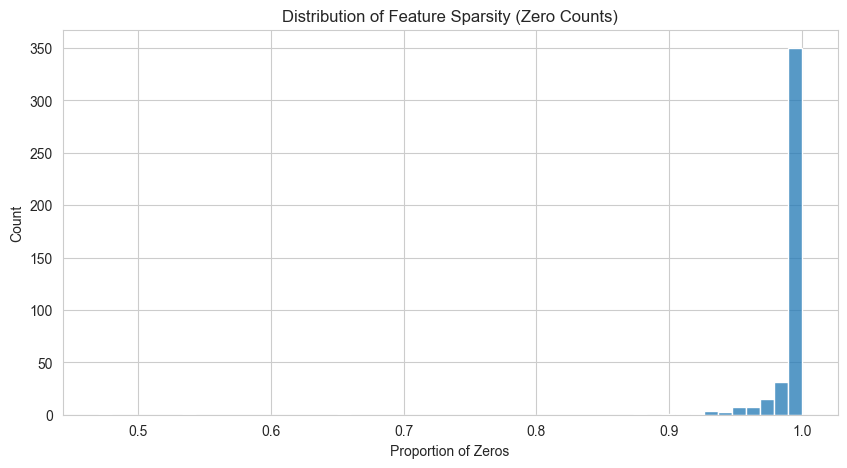

In [5]:
# Filter for Group columns
group_cols = [c for c in train_df.columns if 'Group' in c]
print(f'Number of group features: {len(group_cols)}')

# Check sparsity (percentage of zeros)
sparsity = (train_df[group_cols] == 0).mean()
plt.figure(figsize=(10, 5))
sns.histplot(sparsity, bins=50)
plt.title('Distribution of Feature Sparsity (Zero Counts)')
plt.xlabel('Proportion of Zeros')
plt.show()